In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)

    df.drop(columns=["CropOrgFYM", "Ganaura", "2tdUrea", "2appDaysUrea",], inplace=True)

    # Drop NAN rows
    #df.dropna(inplace=True)

    return df

In [ ]:
dfTin = wrangle(r"C:\Users\sanus\Desktop\MSCDATA\Train.csv")
dfTst = wrangle(r"C:\Users\sanus\Desktop\MSCDATA\Test.csv")
print(dfTin.info(), dfTst.info())
dfTin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [ ]:
dfTin.isnull().sum()

ID                                       0
District                                 0
Block                                    0
CultLand                                 0
CropCultLand                             0
LandPreparationMethod                    0
CropTillageDate                          0
CropTillageDepth                         0
CropEstMethod                            0
RcNursEstDate                           83
SeedingSowingTransplanting               0
SeedlingsPerPit                        289
NursDetFactor                          289
TransDetFactor                         289
TransplantingIrrigationHours           193
TransplantingIrrigationSource          115
TransplantingIrrigationPowerSource     503
TransIrriCost                          882
StandingWater                          238
OrgFertilizers                        1335
PCropSolidOrgFertAppMethod            1337
NoFertilizerAppln                        0
CropbasalFerts                         188
BasalDAP   

In [ ]:
dfTst.isnull().sum()

ID                                      0
District                                0
Block                                   0
CultLand                                0
CropCultLand                            0
LandPreparationMethod                   0
CropTillageDate                         0
CropTillageDepth                        0
CropEstMethod                           0
RcNursEstDate                          43
SeedingSowingTransplanting              0
SeedlingsPerPit                       103
NursDetFactor                         103
TransDetFactor                        103
TransplantingIrrigationHours           77
TransplantingIrrigationSource          46
TransplantingIrrigationPowerSource    171
TransIrriCost                         317
StandingWater                          79
OrgFertilizers                        415
PCropSolidOrgFertAppMethod            416
NoFertilizerAppln                       0
CropbasalFerts                         76
BasalDAP                          

In [ ]:
dfTin.shape

(3870, 40)

In [ ]:
dfTst.shape

(1290, 39)

In [ ]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = shuffle_and_split_data(dfTin, 0.2)
print(len(train_set), len(test_set))

3096 774


In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dfTin, test_size=0.2, random_state=42)

In [ ]:
dfTin["Yieldone"] = pd.cut(dfTin["Yield"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

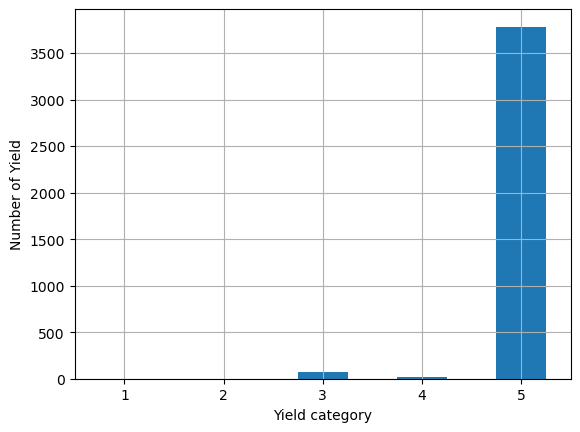

In [ ]:
import matplotlib.pyplot as plt
dfTin["Yieldone"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Yield category")
plt.ylabel("Number of Yield")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(dfTin, dfTin["Yieldone"]):
    strat_train_set_n = dfTin.iloc[train_index]
    strat_test_set_n = dfTin.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [ ]:
strat_train_set, strat_test_set = strat_splits[0]

In [ ]:
strat_train_set, strat_test_set = train_test_split(
    dfTin, test_size=0.2, stratify=dfTin["Yieldone"], random_state=42)

In [ ]:
strat_test_set["Yieldone"].value_counts() / len(strat_test_set)

5    0.978036
3    0.018088
4    0.003876
1    0.000000
2    0.000000
Name: Yieldone, dtype: float64

In [ ]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["Yieldone"].value_counts() / len(data)

train_set, test_set = train_test_split(dfTin, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(dfTin),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Yieldone Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Yieldone Category,,,,,
1,0.00,0.00,0.00,NaN,NaN
2,0.00,0.00,0.00,NaN,NaN
3,1.81,1.81,1.29,0.00,-28.57
4,0.44,0.39,0.52,-11.76,17.65
5,97.75,97.80,98.19,0.05,0.45


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Yieldone", axis=1, inplace=True)

In [ ]:
dfTin = strat_train_set.copy()

In [ ]:
corr_matrix = dfTin.corr()

In [ ]:
corr_matrix["Yield"].sort_values(ascending=False)

Yield                           1.000000
Acre                            0.688605
1tdUrea                         0.437519
BasalDAP                        0.430064
BasalUrea                       0.339325
TransIrriCost                   0.285787
CultLand                        0.250368
CropCultLand                    0.238776
Harv_hand_rent                  0.160393
Residue_perc                    0.061991
TransplantingIrrigationHours    0.004606
StandingWater                  -0.002158
CropTillageDepth               -0.010693
1appDaysUrea                   -0.016054
NoFertilizerAppln              -0.023323
SeedlingsPerPit                -0.025212
Residue_length                 -0.216388
Name: Yield, dtype: float64

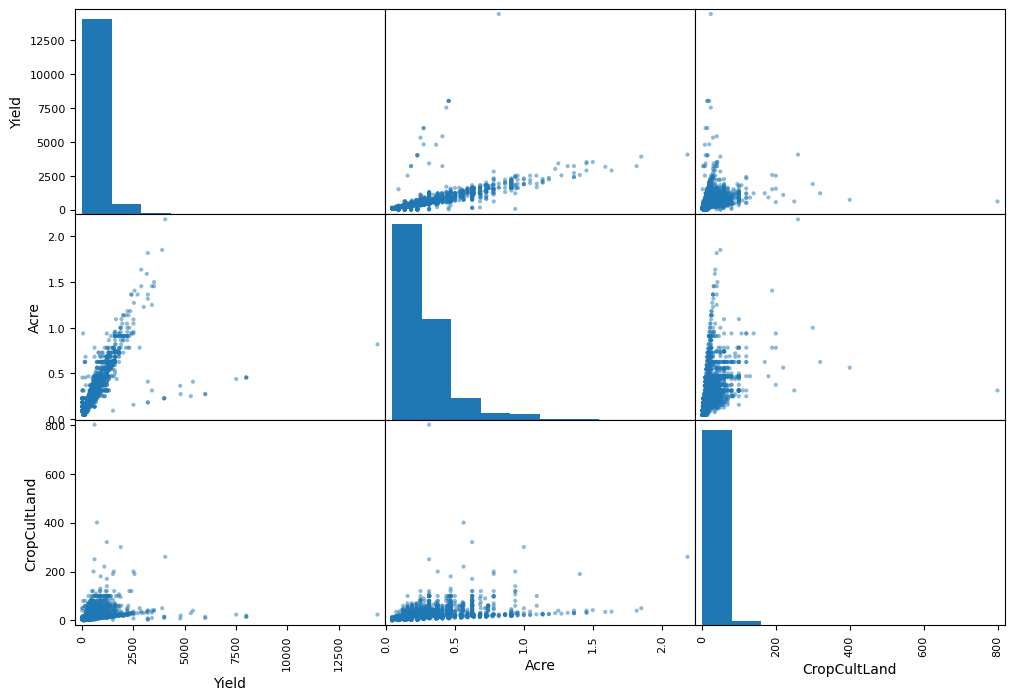

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Yield", "Acre", "CropCultLand",]
scatter_matrix(dfTin[attributes], figsize=(12, 8))
plt.show()

In [ ]:
dfTin = strat_train_set.drop(["ID","Yield"], axis=1)
dfTin = dfTin.select_dtypes(include=np.number)
dfTin_labels = strat_train_set["Yield"].copy()

In [ ]:
null_rows_idx = dfTin.isnull().any(axis=1)
dfTin.loc[null_rows_idx].head()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre
3720,25,25,6,4.0,NaN,NaN,12.0,2,10.0,NaN,5.0,35.0,400.0,30,10,0.259259
1409,60,60,4,NaN,8.0,600.0,2.0,2,30.0,60.0,40.0,16.0,1500.0,26,10,0.937500
1365,30,30,4,3.0,2.0,250.0,5.0,3,5.0,NaN,7.0,27.0,150.0,28,10,0.227273
3168,58,58,5,2.0,NaN,NaN,4.0,2,22.0,15.0,30.0,42.0,5.0,25,10,0.468750
2162,25,20,4,1.0,3.0,350.0,2.0,3,16.0,NaN,16.0,23.0,1000.0,22,10,0.727273


In [ ]:
dfTin.isnull().sum()

CultLand                           0
CropCultLand                       0
CropTillageDepth                   0
SeedlingsPerPit                  231
TransplantingIrrigationHours     160
TransIrriCost                    716
StandingWater                    189
NoFertilizerAppln                  0
BasalDAP                         446
BasalUrea                       1362
1tdUrea                          431
1appDaysUrea                     431
Harv_hand_rent                   204
Residue_length                     0
Residue_perc                       0
Acre                               0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
dfTin_num = dfTin.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(dfTin_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([2.00000000e+01, 2.00000000e+01, 4.00000000e+00, 2.00000000e+00,
       4.00000000e+00, 2.50000000e+02, 3.00000000e+00, 2.00000000e+00,
       1.00000000e+01, 1.00000000e+01, 1.00000000e+01, 2.80000000e+01,
       3.95000000e+02, 2.60000000e+01, 1.00000000e+01, 2.27272727e-01])

In [ ]:
dfTin_num.median().values

array([2.00000000e+01, 2.00000000e+01, 4.00000000e+00, 2.00000000e+00,
       4.00000000e+00, 2.50000000e+02, 3.00000000e+00, 2.00000000e+00,
       1.00000000e+01, 1.00000000e+01, 1.00000000e+01, 2.80000000e+01,
       3.95000000e+02, 2.60000000e+01, 1.00000000e+01, 2.27272727e-01])

In [ ]:
X = imputer.transform(dfTin_num)

In [ ]:
imputer.feature_names_in_

array(['CultLand', 'CropCultLand', 'CropTillageDepth', 'SeedlingsPerPit',
       'TransplantingIrrigationHours', 'TransIrriCost', 'StandingWater',
       'NoFertilizerAppln', 'BasalDAP', 'BasalUrea', '1tdUrea',
       '1appDaysUrea', 'Harv_hand_rent', 'Residue_length', 'Residue_perc',
       'Acre'], dtype=object)

In [ ]:
dfTin_tr = pd.DataFrame(X, columns=dfTin_num.columns,
                          index=dfTin_num.index)

In [ ]:
dfTin_tr.loc[null_rows_idx].head()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre
3720,25.0,25.0,6.0,4.0,4.0,250.0,12.0,2.0,10.0,10.0,5.0,35.0,400.0,30.0,10.0,0.259259
1409,60.0,60.0,4.0,2.0,8.0,600.0,2.0,2.0,30.0,60.0,40.0,16.0,1500.0,26.0,10.0,0.937500
1365,30.0,30.0,4.0,3.0,2.0,250.0,5.0,3.0,5.0,10.0,7.0,27.0,150.0,28.0,10.0,0.227273
3168,58.0,58.0,5.0,2.0,4.0,250.0,4.0,2.0,22.0,15.0,30.0,42.0,5.0,25.0,10.0,0.468750
2162,25.0,20.0,4.0,1.0,3.0,350.0,2.0,3.0,16.0,10.0,16.0,23.0,1000.0,22.0,10.0,0.727273


In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [ ]:
outlier_pred

array([ 1, -1,  1, ...,  1,  1,  1])

In [ ]:
dfTin = dfTin.iloc[outlier_pred == 1]
dfTin_labels = dfTin_labels.iloc[outlier_pred == 1]

In [ ]:
 from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["CultLand", "CropCultLand", "CropTillageDepth", "SeedlingsPerPit", "TransplantingIrrigationHours", "TransIrriCost",
              "StandingWater", "NoFertilizerAppln", "BasalDAP", "BasalUrea", "1tdUrea", "1appDaysUrea","Harv_hand_rent",
               "Residue_length", "Residue_perc", "Acre"]
cat_attribs = ["ID", "District", "Block", "LandPreparationMethod", "CropTillageDate", "CropEstMethod", "RcNursEstDate",
              "SeedingSowingTransplanting", "NursDetFactor", "TransDetFactor", "TransplantingIrrigationSource", "TransplantingIrrigationPowerSource",
              "OrgFertilizers", "PCropSolidOrgFertAppMethod", "CropbasalFerts", "MineralFertAppMethod", "FirstTopDressFert", "MineralFertAppMethod.1",
              "Harv_method", "Harv_date", "Threshing_date", "Threshing_method", "Stubble_use"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
X_train = preprocessing.fit_transform(dfTin)
X_train

array([[-0.02800344,  0.17601834,  1.32480591, ...,  1.08851555,
        -0.20720475, -0.03052971],
       [ 0.24537243,  0.46508508, -0.43415981, ...,  0.44221291,
        -0.20720475, -0.2330752 ],
       [ 1.77627731,  2.08385881,  0.44532305, ..., -0.52724106,
        -0.20720475,  1.29601005],
       ...,
       [ 0.24537243,  0.29164504, -1.31364267, ..., -0.20408974,
        -0.20720475, -0.2330752 ],
       [ 1.88562766, -0.34430179,  0.44532305, ..., -0.52724106,
        -0.20720475,  1.49389167],
       [ 1.06550004,  1.33228529, -0.43415981, ..., -0.52724106,
         4.82614408,  0.30660194]])

In [ ]:
# extra code – shows that we can get a DataFrame out if we want
dfTin_prepared_fr = pd.DataFrame(
    X_train,
    columns=preprocessing.get_feature_names_out(),
    index=dfTin.index)
dfTin_prepared_fr.head()

,pipeline-1__CultLand,pipeline-1__CropCultLand,pipeline-1__CropTillageDepth,pipeline-1__SeedlingsPerPit,pipeline-1__TransplantingIrrigationHours,pipeline-1__TransIrriCost,pipeline-1__StandingWater,pipeline-1__NoFertilizerAppln,pipeline-1__BasalDAP,pipeline-1__BasalUrea,pipeline-1__1tdUrea,pipeline-1__1appDaysUrea,pipeline-1__Harv_hand_rent,pipeline-1__Residue_length,pipeline-1__Residue_perc,pipeline-1__Acre
3720,-0.028003,0.176018,1.324806,0.152796,-0.098649,-0.253593,4.201423,-0.32271,-0.028497,-0.160968,-0.842946,0.525217,-0.067504,1.088516,-0.207205,-0.030530
1365,0.245372,0.465085,-0.434160,0.033354,-0.212512,-0.220834,0.862636,1.26363,-0.992167,-0.160968,-0.526420,-0.159989,-0.278791,0.442213,-0.207205,-0.233075
3168,1.776277,2.083859,0.445323,-0.086089,-0.098649,-0.253593,0.385666,-0.32271,2.284311,0.900621,3.113623,1.124773,-0.401338,-0.527241,-0.207205,1.296010
1703,-0.028003,-0.113048,-0.434160,0.152796,0.129078,1.580896,-1.045243,-0.32271,1.127907,1.112938,-0.526420,-1.873006,0.101527,-0.204090,-0.207205,1.206064
2162,-0.028003,-0.113048,-0.434160,-0.205531,-0.155581,0.106753,-0.568273,1.26363,1.127907,-0.160968,0.897944,-0.502593,0.439587,-1.496695,-0.207205,2.933031


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(dfTin.fillna(0), dfTin_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000289544F3460>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000289545215D0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
dfTin_predictions = lin_reg.predict(dfTin.fillna(0))
dfTin_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([ 400.,  400., 1000., 1000., 1600.])

In [ ]:
dfTin_labels.iloc[:5].values

array([ 546,  375,  900,  800, 1600], dtype=int64)

In [ ]:
# extra code – computes the error ratios discussed in the book
error_ratios = dfTin_predictions[:5].round(-2) / dfTin_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-26.7%, 6.7%, 11.1%, 25.0%, 0.0%


In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(dfTin_labels, dfTin_predictions,
                              squared=False)
lin_rmse

455.0540960447387

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(dfTin.fillna(0), dfTin_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000289544F3460>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000289545215D0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
dfTin_predictions = tree_reg.predict(dfTin.fillna(0))
tree_rmse = mean_squared_error(dfTin_labels, dfTin_predictions,
                              squared=False)
tree_rmse

7.076151112251914

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, dfTin.fillna(0), dfTin_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(tree_rmses).describe()

count     10.000000
mean     718.398279
std      170.868928
min      371.186005
25%      656.543560
50%      727.651820
75%      851.846451
max      940.212238
dtype: float64

In [ ]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, dfTin.fillna(0), dfTin_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count     10.000000
mean     400.996395
std      245.336561
min      156.237509
25%      212.311187
50%      317.713208
75%      531.137541
max      909.024957
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))

In [ ]:
forest_rmses = -cross_val_score(forest_reg, dfTin.fillna(0), dfTin_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(forest_rmses).describe()

count     10.000000
mean     444.103144
std      211.418194
min      211.269361
25%      327.906650
50%      363.574408
75%      565.930033
max      914.616357
dtype: float64

In [ ]:
forest_reg.fit(dfTin.fillna(0), dfTin_labels)
dfTin_predictions = forest_reg.predict(dfTin)
forest_rmse = mean_squared_error(dfTin_labels, dfTin_predictions,
                                 squared=False)
forest_rmse

218.80463890408848

In [ ]:
# Make predictions on the Zindi test set
preds = forest_reg.predict(dfTst.fillna(0))

# Create submisiion file to be uploaded to Zindi for scoring
subs = pd.DataFrame({'ID': dfTst.ID, 'Yield': preds})
subs.to_csv('mysubmission1.csv', index = False)

subs.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,679.96
1,ID_SO3VW2X4QO93,418.26
2,ID_UKUQ7JM8E894,487.81
3,ID_QUISMWEZR2H4,301.00
4,ID_25JGI455VKCZ,658.03


In [ ]:
subs.isnull().sum()

ID       0
Yield    0
dtype: int64

In [ ]:
# Make predictions on the Zindi test set
preds = lin_reg.predict(dfTst.fillna(0))

# Create submisiion file to be uploaded to Zindi for scoring
subs = pd.DataFrame({'ID': dfTst.ID, 'Yield': preds})
subs.to_csv('mysubmission2.csv', index = False)

subs.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,588.768266
1,ID_SO3VW2X4QO93,399.185730
2,ID_UKUQ7JM8E894,403.822369
3,ID_QUISMWEZR2H4,272.941941
4,ID_25JGI455VKCZ,662.240911


In [ ]:
# Make predictions on the Zindi test set
preds = tree_reg.predict(dfTst.fillna(0))

# Create submisiion file to be uploaded to Zindi for scoring
subs = pd.DataFrame({'ID': dfTst.ID, 'Yield': preds})
subs.to_csv('mysubmission3.csv', index = False)

subs.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,800.0
1,ID_SO3VW2X4QO93,425.0
2,ID_UKUQ7JM8E894,410.0
3,ID_QUISMWEZR2H4,350.0
4,ID_25JGI455VKCZ,450.0


In [ ]:
# Make predictions on the Zindi test set
preds = lin_reg.predict(dfTst.fillna(0))

# Create submisiion file to be uploaded to Zindi for scoring
subs = pd.DataFrame({'ID': dfTst.ID, 'Yield': preds})
subs.to_csv('mysubmission4.csv', index = False)

subs.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,588.768266
1,ID_SO3VW2X4QO93,399.185730
2,ID_UKUQ7JM8E894,403.822369
3,ID_QUISMWEZR2H4,272.941941
4,ID_25JGI455VKCZ,662.240911


In [ ]:
# Make predictions on the Zindi test set
preds = lin_reg.predict(dfTst.fillna(0))

# Create submisiion file to be uploaded to Zindi for scoring
subs = pd.DataFrame({'ID': dfTst.ID, 'Yield': preds})
subs.to_csv('mysubmission5.csv', index = False)

subs.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,588.768266
1,ID_SO3VW2X4QO93,399.185730
2,ID_UKUQ7JM8E894,403.822369
3,ID_QUISMWEZR2H4,272.941941
4,ID_25JGI455VKCZ,662.240911


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

hgb_reg = make_pipeline(
    make_column_transformer(( OneHotEncoder(), ["ID"]),remainder="passthrough"),

    HistGradientBoostingRegressor(categorical_features=[0], random_state=42)
)
hgb_reg.fit(dfTin.fillna(0), dfTin_labels)

ValueError: A given column is not a column of the dataframe

In [ ]:
# extra code – evaluate the RMSE stats for the hgb_reg model

from sklearn.model_selection import cross_val_score

hgb_rmses = -cross_val_score(hgb_reg, dfTin.fillna(0), dfTin_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(hgb_rmses).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64